In [143]:
from helius import NFTAPI, NameAPI, BalancesAPI, WebhooksAPI, TransactionsAPI
from dotenv import load_dotenv
from pathlib import Path
import requests
import pandas as pd
import numpy as np
import os
import time
import json
import joblib


In [144]:
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_columns', None)   
pd.set_option('display.width', 200)    
pd.set_option('display.float_format', '{:.8f}'.format)

In [145]:
df_validators = joblib.load('df_validators.joblib')

df_expanded = joblib.load('df_expanded.joblib')

df_cleaned = joblib.load('df_cleaned.joblib')

df_tps = joblib.load('df_tps.joblib')

df_supply = joblib.load('df_supply.joblib')

df_fees = joblib.load('df_fees.joblib')

df_inflation = joblib.load('df_inflation.joblib')

In [146]:


df_validators #.head()

,network,account,name,keybase_id,www_url,details,avatar_url,created_at,updated_at,admin_warning,jito,jito_commission,stake_pools_list,is_active,avatar_file_url,active_stake,authorized_withdrawer_score,commission,data_center_concentration_score,delinquent,published_information_score,root_distance_score,security_report_score,skipped_slot_score,skipped_after_score,software_version,software_version_score,stake_concentration_score,consensus_mods_score,vote_latency_score,total_score,vote_distance_score,ip,data_center_key,autonomous_system_number,latitude,longitude,data_center_host,vote_account,epoch_credits,epoch,skipped_slots,skipped_slot_percent,ping_time,url
0,mainnet,2gDeeRa3mwPPtw1CMWPkEhRWo9v5izNBBfEXanr8uibX,NuFi,nufi_vl,https://nu.fi,Try NuFi wallet!,https://s3.amazonaws.com/keybase_processed_uploads/a547656e4d522f6c0eec7508ff61a605_360_360.jpg,2021-07-22 12:30:46 UTC,2025-04-24 03:40:06 UTC,None,True,800.00000000,"[Jito, Jpool, Aero]",True,https://prod-validators.nyc3.digitaloceanspaces.com/d297r2amrdfhvfxau8vxj17b9uyu,334760803209436,0,0,0,False,2,2,1,2,2,2.1.21,2,0,0,2.00000000,13,2,109.74.144.98,29405-SK-Šaľa,29405,48.1592,17.8834,None,3Xn3K5zeTzs4sURj1PCRaF6rvFg2hPgT49B4SiM998f7,1441686.00000000,786.00000000,0.00000000,0.0,NaN,https://www.validators.app/api/v1/validators/mainnet/2gDeeRa3mwPPtw1CMWPkEhRWo9v5izNBBfEXanr8uibX
1,mainnet,8n4pc4sCJtBeLfJdGyJn6EcZuhtfTiepRa9ExdJFdmEN,Zeta Node,,https://zeta.markets,Zeta’s high-performing validator provides best-in-class security and reliability.,https://i.postimg.cc/HxCP6D0S/zm.png,2022-02-10 08:25:43 UTC,2025-04-19 03:40:05 UTC,None,True,800.00000000,"[BlazeStake, Jito, Jpool, Marinade]",True,https://prod-validators.nyc3.digitaloceanspaces.com/3c3l28bezom96re6ni7h20z4v8zz,75304950447796,0,0,0,False,2,2,1,2,2,2.1.21,2,0,0,2.00000000,13,2,213.163.64.155,49544-NL-Rotterdam,49544,51.9281,4.422,None,FnAPJkzf19s87sm24Qhv6bHZMZvZ43gjNUBRgjwXpD4v,1441726.00000000,786.00000000,0.00000000,0.0,NaN,https://www.validators.app/api/v1/validators/mainnet/8n4pc4sCJtBeLfJdGyJn6EcZuhtfTiepRa9ExdJFdmEN
2,mainnet,juigBT2qetpYpf1iwgjaiWTjryKkY3uUTVAnRFKkqY6,ProStaking,,https://ProStaking.com,Pro Staking for Pro Stakers | formerly Juicy Stake | Follow @knox,https://tinyurl.com/prostaking,2022-06-20 18:30:06 UTC,2025-05-02 21:10:54 UTC,None,True,800.00000000,"[BlazeStake, Marinade]",True,https://prod-validators.nyc3.digitaloceanspaces.com/sakyp67c7qb04a63hje3a3v3rh37,751948733057295,0,4,0,False,2,2,1,2,2,0.411.20121,2,0,0,2.00000000,13,2,69.2.42.124,20355-US-Baton Rouge,20355,30.4485,-91.13,None,juicQdAnksqZ5Yb8NQwCLjLWhykvXGktxnQCDvMe6Nx,1439474.00000000,786.00000000,0.00000000,0.0,NaN,https://www.validators.app/api/v1/validators/mainnet/juigBT2qetpYpf1iwgjaiWTjryKkY3uUTVAnRFKkqY6
3,mainnet,6gnbmed7kzwQVQ7ghsjgEuCoYmGeWciV2qCwni6WS6HU,Capital Alliance 0% Fee,,https://capitall.app/,"Capital Alliance is a reliable, secure, and trusted validator committed to supporting Solana decentralization and growth. With ZERO FEES, enterprise-grade hardware, we ensure the BEST APY. Staking is open to all users and communities. Join our Discord for",https://capitall.app/images/CapitalAlliance-sm-dark.jpg,2023-12-25 16:10:06 UTC,2025-05-01 03:40:05 UTC,None,True,1000.00000000,"[Edgevana, Marinade]",True,https://prod-validators.nyc3.digitaloceanspaces.com/szuka2uyd2fus3l1rmzy6jfurhzg,52466647039716,0,0,0,False,2,2,1,2,2,2.1.21,2,0,0,2.00000000,13,2,46.21.153.94,29802-US-Los Angeles,29802,34.0515,-118.2707,None,DTwEEF6VSrmTBYkDcj3BKAc52qhvP8CEQUEAMMT1cG3,1441686.00000000,786.00000000,0.00000000,0.0,NaN,https://www.validators.app/api/v1/validators/mainnet/6gnbmed7kzwQVQ7ghsjgEuCoYmGeWciV2qCwni6WS6HU
4,mainnet,3WDh9HgusCujDmXCVhophLrHvoKHQd1Sd4uFHz1Awo35,Absolute Guard,,https://github.com/a-guard,"Absolute Guard is a dedicated Solana validator providing robust network security and high performance, ensuring reliable and efficient transaction validation.",https://raw.githubusercontent.com/a-guard/media-assets/master/log

In [147]:
df_validators.columns.to_list()


['network',
 'account',
 'name',
 'keybase_id',
 'www_url',
 'details',
 'avatar_url',
 'created_at',
 'updated_at',
 'admin_warning',
 'jito',
 'jito_commission',
 'stake_pools_list',
 'is_active',
 'avatar_file_url',
 'active_stake',
 'authorized_withdrawer_score',
 'commission',
 'data_center_concentration_score',
 'delinquent',
 'published_information_score',
 'root_distance_score',
 'security_report_score',
 'skipped_slot_score',
 'skipped_after_score',
 'software_version',
 'software_version_score',
 'stake_concentration_score',
 'consensus_mods_score',
 'vote_latency_score',
 'total_score',
 'vote_distance_score',
 'ip',
 'data_center_key',
 'autonomous_system_number',
 'latitude',
 'longitude',
 'data_center_host',
 'vote_account',
 'epoch_credits',
 'epoch',
 'skipped_slots',
 'skipped_slot_percent',
 'ping_time',
 'url']

In [148]:


df_expanded.head()

,timestamp,nodePubkey,commission,activatedStake,lastVote,rootSlot,epochVoteAccount,epoch,credits,previous_credits,credits_earned,votePubkey
5852,2025-05-13 01:26:26.561946+00:00,138KHwTqKNWGLoo8fK5i8UxYtwoC5tC8o7M9rY1CDEjT,0,28931907684368,339642420,339642389,True,782,663485837,656598333,6887504,ASfKFAKz6fH4eip1jdLGt5Ym954kU9KYnwq2Csn9ogSz
5853,2025-05-13 01:26:26.561946+00:00,138KHwTqKNWGLoo8fK5i8UxYtwoC5tC8o7M9rY1CDEjT,0,28931907684368,339642420,339642389,True,783,670375331,663485837,6889494,ASfKFAKz6fH4eip1jdLGt5Ym954kU9KYnwq2Csn9ogSz
5854,2025-05-13 01:26:26.561946+00:00,138KHwTqKNWGLoo8fK5i8UxYtwoC5tC8o7M9rY1CDEjT,0,28931907684368,339642420,339642389,True,784,677274232,670375331,6898901,ASfKFAKz6fH4eip1jdLGt5Ym954kU9KYnwq2Csn9ogSz
5855,2025-05-13 01:26:26.561946+00:00,138KHwTqKNWGLoo8fK5i8UxYtwoC5tC8o7M9rY1CDEjT,0,28931907684368,339642420,339642389,True,785,684174907,677274232,6900675,ASfKFAKz6fH4eip1jdLGt5Ym954kU9KYnwq2Csn9ogSz
5856,2025-05-13 01:26:26.561946+00:00,138KHwTqKNWGLoo8fK5i8UxYtwoC5tC8o7M9rY1CDEjT,0,28931907684368,339642420,339642389,True,786,685616283,684174907,1441376,ASfKFAKz6fH4eip1jdLGt5Ym954kU9KYnwq2Csn9ogSz


In [149]:
df_expanded['vote_account'] = df_expanded['votePubkey']

In [150]:
# df_expanded.columns.to_list()

In [151]:
df_merge = df_validators.merge(df_expanded, how = 'left', on = ['vote_account', 'epoch'] )

In [152]:
df_merge["active_stake_SOL"] = df_merge["active_stake"] / 1e9

In [153]:
df_merge.head()

,network,account,name,keybase_id,www_url,details,avatar_url,created_at,updated_at,admin_warning,jito,jito_commission,stake_pools_list,is_active,avatar_file_url,active_stake,authorized_withdrawer_score,commission_x,data_center_concentration_score,delinquent,published_information_score,root_distance_score,security_report_score,skipped_slot_score,skipped_after_score,software_version,software_version_score,stake_concentration_score,consensus_mods_score,vote_latency_score,total_score,vote_distance_score,ip,data_center_key,autonomous_system_number,latitude,longitude,data_center_host,vote_account,epoch_credits,epoch,skipped_slots,skipped_slot_percent,ping_time,url,timestamp,nodePubkey,commission_y,activatedStake,lastVote,rootSlot,epochVoteAccount,credits,previous_credits,credits_earned,votePubkey,active_stake_SOL
0,mainnet,2gDeeRa3mwPPtw1CMWPkEhRWo9v5izNBBfEXanr8uibX,NuFi,nufi_vl,https://nu.fi,Try NuFi wallet!,https://s3.amazonaws.com/keybase_processed_uploads/a547656e4d522f6c0eec7508ff61a605_360_360.jpg,2021-07-22 12:30:46 UTC,2025-04-24 03:40:06 UTC,None,True,800.00000000,"[Jito, Jpool, Aero]",True,https://prod-validators.nyc3.digitaloceanspaces.com/d297r2amrdfhvfxau8vxj17b9uyu,334760803209436,0,0,0,False,2,2,1,2,2,2.1.21,2,0,0,2.00000000,13,2,109.74.144.98,29405-SK-Šaľa,29405,48.1592,17.8834,None,3Xn3K5zeTzs4sURj1PCRaF6rvFg2hPgT49B4SiM998f7,1441686.00000000,786.00000000,0.00000000,0.0,NaN,https://www.validators.app/api/v1/validators/mainnet/2gDeeRa3mwPPtw1CMWPkEhRWo9v5izNBBfEXanr8uibX,2025-05-13 01:26:26.561946+00:00,2gDeeRa3mwPPtw1CMWPkEhRWo9v5izNBBfEXanr8uibX,0.00000000,334760803209436.00000000,339642419.00000000,339642388.00000000,True,705259577.00000000,703818259.00000000,1441318.00000000,3Xn3K5zeTzs4sURj1PCRaF6rvFg2hPgT49B4SiM998f7,334760.80320944
1,mainnet,8n4pc4sCJtBeLfJdGyJn6EcZuhtfTiepRa9ExdJFdmEN,Zeta Node,,https://zeta.markets,Zeta’s high-performing validator provides best-in-class security and reliability.,https://i.postimg.cc/HxCP6D0S/zm.png,2022-02-10 08:25:43 UTC,2025-04-19 03:40:05 UTC,None,True,800.00000000,"[BlazeStake, Jito, Jpool, Marinade]",True,https://prod-validators.nyc3.digitaloceanspaces.com/3c3l28bezom96re6ni7h20z4v8zz,75304950447796,0,0,0,False,2,2,1,2,2,2.1.21,2,0,0,2.00000000,13,2,213.163.64.155,49544-NL-Rotterdam,49544,51.9281,4.422,None,FnAPJkzf19s87sm24Qhv6bHZMZvZ43gjNUBRgjwXpD4v,1441726.00000000,786.00000000,0.00000000,0.0,NaN,https://www.validators.app/api/v1/validators/mainnet/8n4pc4sCJtBeLfJdGyJn6EcZuhtfTiepRa9ExdJFdmEN,2025-05-13 01:26:26.561946+00:00,8n4pc4sCJtBeLfJdGyJn6EcZuhtfTiepRa9ExdJFdmEN,0.00000000,75304950447796.00000000,339642419.00000000,339642388.00000000,True,733453761.00000000,732012403.00000000,1441358.00000000,FnAPJkzf19s87sm24Qhv6bHZMZvZ43gjNUBRgjwXpD4v,75304.95044780
2,mainnet,juigBT2qetpYpf1iwgjaiWTjryKkY3uUTVAnRFKkqY6,ProStaking,,https://ProStaking.com,Pro Staking for Pro Stakers | formerly Juicy Stake | Follow @knox,https://tinyurl.com/prostaking,2022-06-20 18:30:06 UTC,2025-05-02 21:10:54 UTC,None,True,800.00000000,"[BlazeStake, Marinade]",True,https://prod-validators.nyc3.digitaloceanspaces.com/sakyp67c7qb04a63hje3a3v3rh37,751948733057295,0,4,0,False,2,2,1,2,2,0.411.20121,2,0,0,2.00000000,13,2,69.2.42.124,20355-US-Baton Rouge,20355,30.4485,-91.13,None,juicQdAnksqZ5Yb8NQwCLjLWhykvXGktxnQCDvMe6Nx,1439474.00000000,786.00000000,0.00000000,0.0,NaN,https://www.validators.app/api/v1/validators/mainnet/juigBT2qetpYpf1iwgjaiWTjryKkY3uUTVAnRFKkqY6,2025-05-13 01:26:26.561946+00:00,juigBT2qetpYpf1iwgjaiWTjryKkY3uUTVAnRFKkqY6,4.00000000,751948733057295.00000000,339642419.00000000,339642388.00000000,True,718299931.00000000,716860809.00000000,1439122.00000000,juicQdAnksqZ5Yb8NQwCLjLWhykvXGktxnQCDvMe6Nx,751948.73305729
3,mainnet,6gnbmed7kzwQVQ7ghsjgEuCoYmGeWciV2qCwni6WS6HU,Capital Alliance 0% Fee,,https://capitall.app/,"Capital Alliance is a reliable, secure, and trusted validator committed to supporting Solana decentralization and growth. With ZERO FEES, enterprise-grade hardware, we e

In [154]:
# ['avatar_url','name', active_stake', 'activatedStake', 'lastVote', 'rootSlot', 'delinquent', 'commission', 'epoch_credits', 'skipped_slot_percent', 'jito_commission', 'jito','details','data_center_key','latitude',	'longitude' ]

In [155]:
current_validator_performance = df_merge[
    ['avatar_url', 'name', 'active_stake_SOL', 'delinquent', 'commission_y', 
     'epoch_credits', 'skipped_slot_percent', 'jito_commission', 'jito', 
     'details']
    ]

current_validator_performance.head()

,avatar_url,name,active_stake_SOL,delinquent,commission_y,epoch_credits,skipped_slot_percent,jito_commission,jito,details
0,https://s3.amazonaws.com/keybase_processed_uploads/a547656e4d522f6c0eec7508ff61a605_360_360.jpg,NuFi,334760.80320944,False,0.00000000,1441686.00000000,0.0,800.00000000,True,Try NuFi wallet!
1,https://i.postimg.cc/HxCP6D0S/zm.png,Zeta Node,75304.95044780,False,0.00000000,1441726.00000000,0.0,800.00000000,True,Zeta’s high-performing validator provides best-in-class security and reliability.
2,https://tinyurl.com/prostaking,ProStaking,751948.73305729,False,4.00000000,1439474.00000000,0.0,800.00000000,True,Pro Staking for Pro Stakers | formerly Juicy Stake | Follow @knox
3,https://capitall.app/images/CapitalAlliance-sm-dark.jpg,Capital Alliance 0% Fee,52466.64703972,False,0.00000000,1441686.00000000,0.0,1000.00000000,True,"Capital Alliance is a reliable, secure, and trusted validator committed to supporting Solana decentralization and growth. With ZERO FEES, enterprise-grade hardware, we ensure the BEST APY. Staking is open to all users and communities. Join our Discord for"
4,https://raw.githubusercontent.com/a-guard/media-assets/master/logo.png,Absolute Guard,47320.48833078,False,0.00000000,1439330.00000000,0.0,0.00000000,True,"Absolute Guard is a dedicated Solana validator providing robust network security and high performance, ensuring reliable and efficient transaction validation."


In [156]:
latest_epoch = df_cleaned['epoch'].max()

df_cleaned = df_cleaned.dropna()
# Filter out the rows with the latest epoch where total_rewards and total_active_stake are NaN
df_cleaned = df_cleaned[~((df_cleaned['epoch'] == latest_epoch) & df_cleaned['total_rewards'].isna() & df_cleaned['total_active_stake'].isna())].reset_index(drop=True)



df_cleaned.head(n=5)

,epoch,starting_slot,slots_in_epoch,network,created_at,total_rewards,total_active_stake,timestamp,nodePubkey,commission,activatedStake,lastVote,rootSlot,epochVoteAccount,credits,previous_credits,credits_earned,votePubkey,activatedStake_SOL,activatedStake_USD,vote_account,total_reward_SOL,total_active_stake_SOL,name,keybase_id,www_url,details,avatar_url
0,785,339120000,432000,mainnet,2025-05-10T16:10:25.000Z,149125956701354.00000000,390905360209121664.00000000,2025-05-13 01:26:26.561946+00:00,FLWc77X8dKh5RdJe5xMFxry8kvSVUbo9G4MQ8hCAg5ve,0,94355116478825,339642419,339642388,True,759218373,752317629,6900744,EcZBjDPzSZLdsyKCBq26MZMYFfiinZsfcL3SwWMK1eNL,94355.11647883,16194168.64126074,EcZBjDPzSZLdsyKCBq26MZMYFfiinZsfcL3SwWMK1eNL,149125.95670135,390905360.20912164,WALL·E,,https://walle.co.za,"I dove into Solana's universe, mastering every aspect.",https://files.catbox.moe/6au3zf.png
1,785,339120000,432000,mainnet,2025-05-10T16:10:25.000Z,149125956701354.00000000,390905360209121664.00000000,2025-05-13 01:26:26.561946+00:00,FUURpC3LjVnxr21PmEfHtxT7Mfe4CVJXxESBjQPvmqTZ,0,289213698736012,339642419,339642388,True,632550167,625649395,6900772,2w4dcnbJDcGrAh4CFAYYpAaEJiUB2q1rFMGByBuB5Cqz,289213.69873601,49637747.11406174,2w4dcnbJDcGrAh4CFAYYpAaEJiUB2q1rFMGByBuB5Cqz,149125.95670135,390905360.20912164,Vlaber01,,https://discordapp.com/users/880538802479857694,Ukraine blockchain Solana,https://i.ibb.co/L0Hg3yK/ecosystem-solana.png
2,785,339120000,432000,mainnet,2025-05-10T16:10:25.000Z,149125956701354.00000000,390905360209121664.00000000,2025-05-13 01:26:26.561946+00:00,FU8F2V8yCFhseHDc1CJ5Sj1e5AbGNh3MnSe4REYX7a3P,0,5445170265861,339642419,339642388,True,663862661,656966327,6896334,A9YmK82uhCXieM9Cw9gN7W1F2KCxa8U1ArA6qxnyYcXQ,5445.17026586,934554.57272972,A9YmK82uhCXieM9Cw9gN7W1F2KCxa8U1ArA6qxnyYcXQ,149125.95670135,390905360.20912164,C-Key Validators | 0% fee + MEV,,https://bit.ly/4d7hUv0,Reliable staking. High result.,https://i.imgur.com/IbEWOmT.jpeg
3,785,339120000,432000,mainnet,2025-05-10T16:10:25.000Z,149125956701354.00000000,390905360209121664.00000000,2025-05-13 01:26:26.561946+00:00,FPPo2aGYYwDWK1Rmr4sXjiCaZzzMwGKi67ijAiVZKwb8,5,19012413531495,339642419,339642388,True,690386729,683485991,6900738,FKCcfoLt2pq7boiNqRGucVq5LE1K5Dt4HALCx2WbEQkv,19012.41353149,3263100.53441049,FKCcfoLt2pq7boiNqRGucVq5LE1K5Dt4HALCx2WbEQkv,149125.95670135,390905360.20912164,NannyNode,nannyventures,https://nanny.ventures,NannyVentures Team,https://s3.amazonaws.com/keybase_processed_uploads/a9876b838a0ebcfc74600f2c51bbb805_360_360.jpg
4,785,339120000,432000,mainnet,2025-05-10T16:10:25.000Z,149125956701354.00000000,390905360209121664.00000000,2025-05-13 01:26:26.561946+00:00,FNKgX9dYUhYQFRTM9bkeKoRpsyEtZGNMxbdQLDzfqB8a,8,832667342673228,339642419,339642388,True,131723774,124827770,6896004,AaVsZUEnrHUZoXC2oVgTY3GF5GGhzCTBGrjpBtuUWy1H,832667.34267323,142910696.02300611,AaVsZUEnrHUZoXC2oVgTY3GF5GGhzCTBGrjpBtuUWy1H,149125.95670135,390905360.20912164,Coinbase 04,,https://coinbase.com/staking,"Coinbase maintains world-class, enterprise-grade staking infrastructure across multiple networks with zero slashing events and a 99% uptime guarantee.",https://static-assets.coinbase.com/email/coinbase-logo-round.png


In [157]:
df_cleaned["related_stake_percent"] = df_cleaned["activatedStake_SOL"]/df_cleaned["total_active_stake_SOL"]*100
df_cleaned["related_stake_percent"]


0      0.02413759
1      0.07398561
2      0.00139296
3      0.00486369
4      0.21300996
          ...    
3394   0.00241134
3395   0.00000054
3396   0.00075217
3397   0.00095105
3398   0.00002658
Name: related_stake_percent, Length: 3399, dtype: float64

# Top 10 Validators by Active Stake

In [158]:
df_merge

# Replace Python None and string 'None' with 'Unknown'
df_merge['name'] = df_merge['name'].replace([None, 'None'], 'Unknown')

df_merge['active_stake_SOL'] = pd.to_numeric(df_merge['active_stake_SOL'], errors='coerce')
#df_cleaned['related_stake_percent'] = pd.to_numeric(df_cleaned['related_stake_percent'], errors='coerce')

top_10_validators = df_merge[['name', 'active_stake_SOL']].sort_values(
    by='active_stake_SOL', ascending=False).head(10)

top_10_validators.reset_index(drop=True, inplace=True)

# Display the result
print(top_10_validators)


                name  active_stake_SOL
0             Helius 13837704.58902316
1    binance staking 12318202.08302838
2             Galaxy  9593093.10220637
3        Coinbase 02  8887827.71239061
4  Ledger by Figment  8754868.28274627
5            Figment  7566462.28773269
6              Kiln1  6632074.19772173
7          Everstake  5942626.50301785
8      SOL Community  5861700.62864363
9            Unknown  5534621.86033889


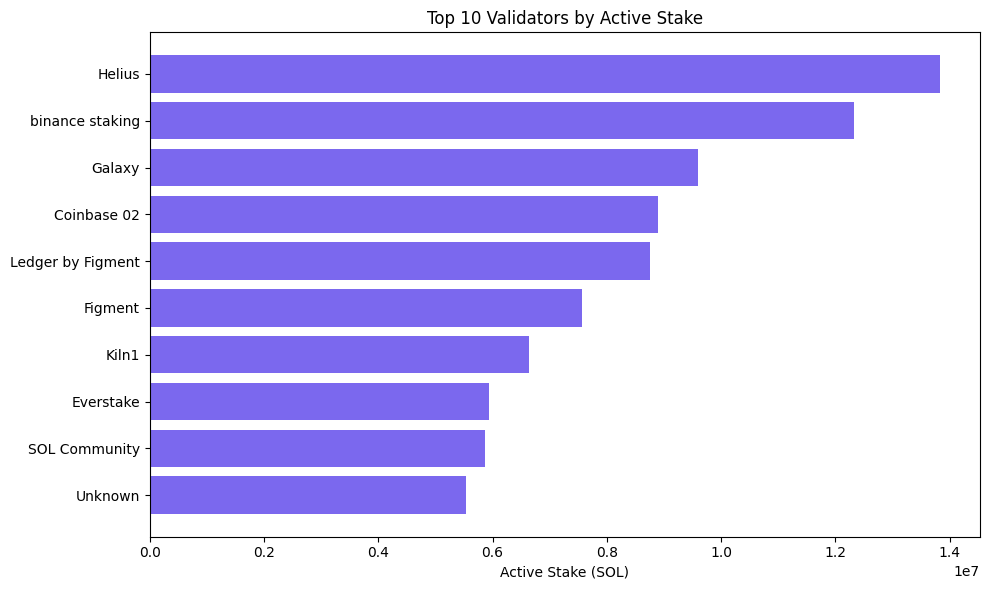

In [159]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_10_validators['name'], top_10_validators['active_stake_SOL'], color='mediumslateblue')
plt.xlabel('Active Stake (SOL)')
plt.title('Top 10 Validators by Active Stake')
plt.gca().invert_yaxis()  # Largest at the top
plt.tight_layout()
plt.show()


In [174]:
df_merge.columns.to_list()

['network',
 'account',
 'name',
 'keybase_id',
 'www_url',
 'details',
 'avatar_url',
 'created_at',
 'updated_at',
 'admin_warning',
 'jito',
 'jito_commission',
 'stake_pools_list',
 'is_active',
 'avatar_file_url',
 'active_stake',
 'authorized_withdrawer_score',
 'commission_x',
 'data_center_concentration_score',
 'delinquent',
 'published_information_score',
 'root_distance_score',
 'security_report_score',
 'skipped_slot_score',
 'skipped_after_score',
 'software_version',
 'software_version_score',
 'stake_concentration_score',
 'consensus_mods_score',
 'vote_latency_score',
 'total_score',
 'vote_distance_score',
 'ip',
 'data_center_key',
 'autonomous_system_number',
 'latitude',
 'longitude',
 'data_center_host',
 'vote_account',
 'epoch_credits',
 'epoch',
 'skipped_slots',
 'skipped_slot_percent',
 'ping_time',
 'url',
 'timestamp',
 'nodePubkey',
 'commission_y',
 'activatedStake',
 'lastVote',
 'rootSlot',
 'epochVoteAccount',
 'credits',
 'previous_credits',
 'credits_

/var/folders/9f/dspzp56j3pjcftph22hs9gw40000gn/T/ipykernel_831/2309503528.py:19: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/olaoluwatunmise/miniconda3/envs/solana-predict/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


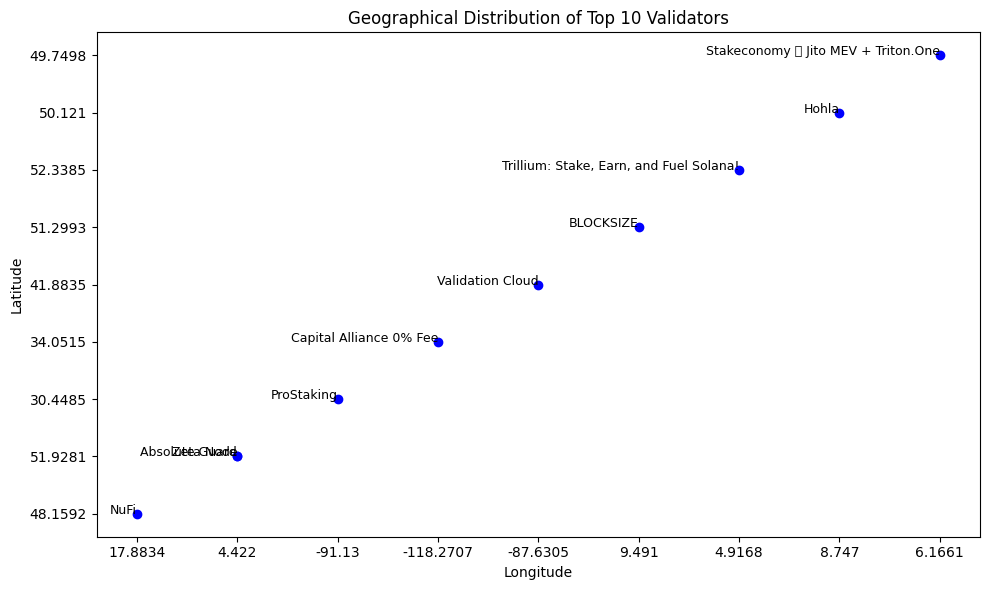

In [160]:
import matplotlib.pyplot as plt

# Select the relevant columns for geographical visualization
top_10_validators_geo = df_merge[['name', 'latitude', 'longitude']].iloc[top_10_validators.index]

# Plotting the geographical distribution (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(top_10_validators_geo['longitude'], top_10_validators_geo['latitude'], color='blue', marker='o')

# Adding labels and title
for i, row in top_10_validators_geo.iterrows():
    plt.text(row['longitude'], row['latitude'], row['name'], fontsize=9, ha='right')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Top 10 Validators')

# Display the plot
plt.tight_layout()
plt.show()


In [161]:
previous_validator_performanced = df_cleaned[
    ['avatar_url', 'name', 'activatedStake_SOL', 'commission', 
     'credits_earned', 'details']
    ]

previous_validator_performanced.head(n=5)

,avatar_url,name,activatedStake_SOL,commission,credits_earned,details
0,https://files.catbox.moe/6au3zf.png,WALL·E,94355.11647883,0,6900744,"I dove into Solana's universe, mastering every aspect."
1,https://i.ibb.co/L0Hg3yK/ecosystem-solana.png,Vlaber01,289213.69873601,0,6900772,Ukraine blockchain Solana
2,https://i.imgur.com/IbEWOmT.jpeg,C-Key Validators | 0% fee + MEV,5445.17026586,0,6896334,Reliable staking. High result.
3,https://s3.amazonaws.com/keybase_processed_uploads/a9876b838a0ebcfc74600f2c51bbb805_360_360.jpg,NannyNode,19012.41353149,5,6900738,NannyVentures Team
4,https://static-assets.coinbase.com/email/coinbase-logo-round.png,Coinbase 04,832667.34267323,8,6896004,"Coinbase maintains world-class, enterprise-grade staking infrastructure across multiple networks with zero slashing events and a 99% uptime guarantee."


# Staking Reward per epoch

In [162]:
df_epochs = joblib.load('df_epochs.joblib')

In [163]:
df_epochs = df_epochs.copy()

df_epochs['total_reward_SOL'] = df_epochs['total_rewards'] / 1e9
df_epochs['total_active_stake_SOL'] = df_epochs['total_active_stake'] / 1e9

# Convert to object type to allow string + float
df_epochs['total_reward_SOL'] = df_epochs['total_reward_SOL'].astype('object')
df_epochs['total_active_stake_SOL'] = df_epochs['total_active_stake_SOL'].astype('object')


df_epochs.loc[0, ['total_reward_SOL', 'total_active_stake_SOL']] = 'ongoing'
#df_epochs

staking_rewards = df_epochs[
    [ 'epoch', 'total_reward_SOL', 'total_active_stake_SOL'

    ]
]

staking_rewards

,epoch,total_reward_SOL,total_active_stake_SOL
0,786,ongoing,ongoing
1,785,149125.95670135,390905360.20912164
2,784,148872.36731620,390601341.25554407
3,783,149356.86382339,391590155.18830347
4,782,149294.26984245,392310799.00643295
5,781,149600.37601859,391208956.63559538
6,780,149328.69851630,392498296.15884197
7,779,149221.32236707,389876708.02058911
8,778,149812.28436985,389896186.28602248
9,777,149912.53971820,389012068.85027254


In [164]:
df_epochs['total_reward_SOL'] = pd.to_numeric(df_epochs['total_reward_SOL'], errors='coerce')
df_epochs['total_active_stake_SOL'] = pd.to_numeric(df_epochs['total_active_stake_SOL'], errors='coerce')
    
    # Drop epoch 786 (ongoing)
df = df_epochs[df_epochs['epoch'] != 786].copy()
    
    # Fill missing total_active_stake_SOL for epoch 773 with average of other epochs
avg_stake = df['total_active_stake_SOL'].mean()
df['total_active_stake_SOL'] = df['total_active_stake_SOL'].fillna(avg_stake)
    
    # Sort by epoch (descending)
df = df.sort_values('epoch', ascending=False)
    
df

,epoch,starting_slot,slots_in_epoch,network,created_at,total_rewards,total_active_stake,total_reward_SOL,total_active_stake_SOL
1,785,339120000,432000,mainnet,2025-05-10T16:10:25.000Z,149125956701354.00000000,390905360209121664.00000000,149125.95670135,390905360.20912164
2,784,338688000,432000,mainnet,2025-05-08T16:51:08.000Z,148872367316200.00000000,390601341255544064.00000000,148872.36731620,390601341.25554407
3,783,338256000,432000,mainnet,2025-05-06T17:20:47.000Z,149356863823391.00000000,391590155188303488.00000000,149356.86382339,391590155.18830347
4,782,337824002,432000,mainnet,2025-05-04T18:04:09.000Z,149294269842450.00000000,392310799006432960.00000000,149294.26984245,392310799.00643295
5,781,337392000,432000,mainnet,2025-05-02T18:48:09.000Z,149600376018593.00000000,391208956635595392.00000000,149600.37601859,391208956.63559538
6,780,336960000,432000,mainnet,2025-04-30T19:23:26.000Z,149328698516297.00000000,392498296158841984.00000000,149328.69851630,392498296.15884197
7,779,336528001,432000,mainnet,2025-04-28T19:56:18.000Z,149221322367074.00000000,389876708020589120.00000000,149221.32236707,389876708.02058911
8,778,336096000,432000,mainnet,2025-04-26T20:24:27.000Z,149812284369850.00000000,389896186286022464.00000000,149812.28436985,389896186.28602248
9,777,335664000,432000,mainnet,2025-04-24T20:53:36.000Z,149912539718199.00000000,389012068850272512.00000000,149912.53971820,389012068.85027254
10,776,335232000,432000,mainnet,2025-04-22T21:15:51.000Z,150073214169453.00000000,386851449869451584.00000000,150073.21416945,386851449.86945158


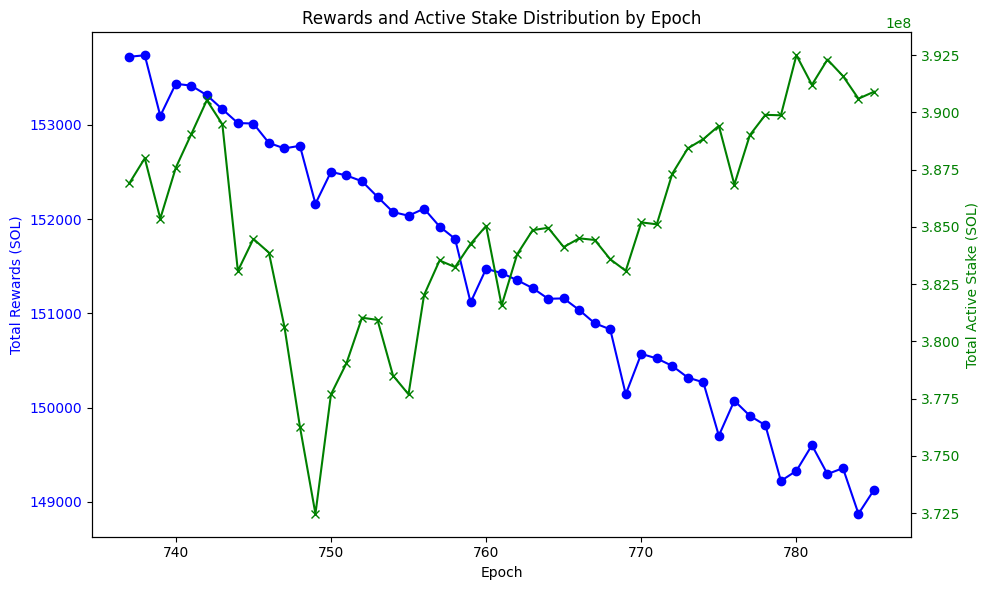

In [165]:
#Plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary Y-axis: Rewards
ax1.plot(df['epoch'], df['total_reward_SOL'], color='blue', marker='o', label='Total Rewards (SOL)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Total Rewards (SOL)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary Y-axis: Active Stake
ax2 = ax1.twinx()
ax2.plot(df['epoch'], df['total_active_stake_SOL'], color='green', marker='x', label='Total Active Stake (SOL)')
ax2.set_ylabel('Total Active Stake (SOL)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and layout
plt.title('Rewards and Active Stake Distribution by Epoch')
fig.tight_layout()
plt.show()

# Reward efficiency per epoch
### Analyzing validator economics

Reward Rate = 
Total Active Stake / Total Reward
​


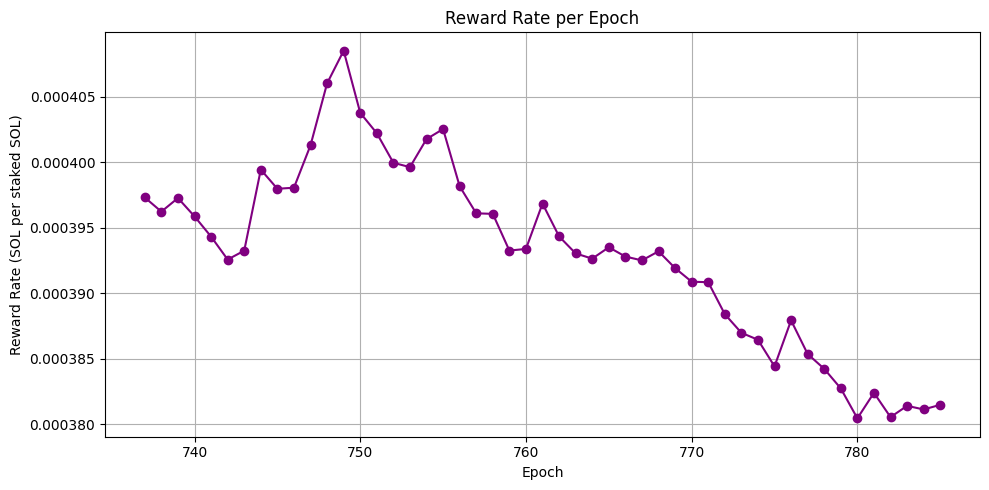

In [166]:
# Compute reward rate (rewards per unit staked)
df['reward_rate'] = df['total_reward_SOL'] / df['total_active_stake_SOL']

# Drop rows with NaN (optional, based on your data)
df = df.dropna(subset=['reward_rate'])

# Plot reward rate
plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['reward_rate'], marker='o', color='purple')
plt.title('Reward Rate per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Reward Rate (SOL per staked SOL)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Inflation Rate Breakdown

In [167]:
df_inflation

,epoch,foundation,total,validator,timestamp
0,786,0.00000000,0.04538333,0.04538333,2025-05-13 01:26:27.260633+00:00


# Network Overview

In [168]:
total_validator = df_expanded['vote_account'].unique().shape[0]
total_validator

1325

In [169]:
# Filter out 'ongoing' rows
concluded_epochs = df_epochs[df_epochs['total_active_stake_SOL'] != 'ongoing']

# Sort by epoch in descending order and get the latest one
latest_concluded = concluded_epochs.sort_values(by='epoch', ascending=False).iloc[0]


latest_active_stake_SOL = latest_concluded['total_active_stake_SOL']
latest_epoch = latest_concluded['epoch']

print(f"Latest concluded epoch: {latest_epoch}")
print(f"Total active stake (SOL): {latest_active_stake_SOL}")


Latest concluded epoch: 786
Total active stake (SOL): nan


In [170]:
tps = df_tps['tps']
tps

0   4214.68333333
Name: tps, dtype: float64

In [171]:
avg_fee_usd = df_fees['avg_fee_usd']
avg_fee_usd

0   0.00085815
Name: avg_fee_usd, dtype: float64

In [172]:
df_supply

,circulating_sol,nonCirculating_sol,total_sol
0,519444081.87973523,81207422.19001375,600651504.06974900


In [173]:
# Extract values
circulating = df_supply['circulating_sol'][0]
non_circulating = df_supply['nonCirculating_sol'][0]

